In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
%matplotlib inline
import numpy as np

In [9]:
#2 Importing the Mall_Customers dataset by pandas
dataset = pd.read_csv('Dataset/Mall_Customers.csv')
X = dataset.iloc[:, [3,4]].values

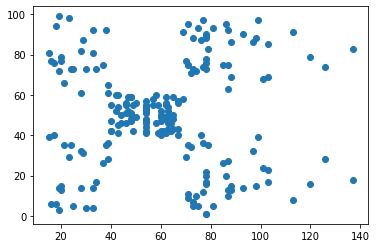

In [10]:
plt.scatter(X[:,0], X[:,1])

 Beginner Classification Clustering Machine Learning Python Structured Data Technique Unsupervised

This article was published as a part of the Data Science Blogathon.
Introduction

k_means_clustering

Clustering is an unsupervised machine learning technique. It is the process of division of the dataset into groups in which the members in the same group possess similarities in features. The commonly used clustering algorithms are K-Means clustering, Hierarchical clustering, Density-based clustering, Model-based clustering, etc. In this article, we are going to discuss K-Means clustering in detail.
K-Means Clustering
 It is the simplest and commonly used iterative type unsupervised learning algorithm. In this, we randomly initialize the K number of centroids in the data (the number of k is found using the Elbow method which will be discussed later in this article ) and iterates these centroids until no change happens to the position of the centroid. Let’s go through the steps involved in K means clustering for a better understanding.

 
1) Select the number of clusters for the dataset ( K )

 
2) Select K number of centroids

 
3) By calculating the Euclidean distance or Manhattan distance assign the points to the nearest centroid, thus creating K groups

 
4) Now find the original centroid in each group

 
5) Again reassign the whole data point based on this new centroid, then repeat step 4 until the position of the centroid doesn’t change.

 
Finding the optimal number of clusters is an important part of this algorithm. A commonly used method for finding optimal K value is Elbow Method.  

 
Elbow Method
In the Elbow method, we are actually varying the number of clusters ( K ) from 1 – 10. For each value of K, we are calculating WCSS ( Within-Cluster Sum of Square ). WCSS is the sum of squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 1. When we analyze the graph we can see that the graph will rapidly change at a point and thus creating an elbow shape. From this point, the graph starts to move almost parallel to the X-axis. The K value corresponding to this point is the optimal K value or an optimal number of clusters.

 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


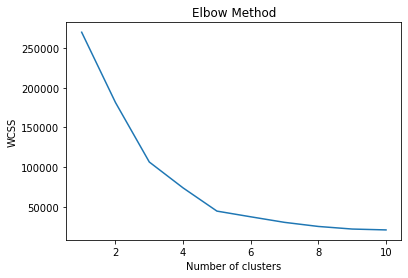

In [11]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [40]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
pred_y = kmeans.fit_predict(X)


    labels_ : gives predicted class labels (cluster) for each data point
    cluster_centers_ : Location of the centroids on each cluster. The data point in a cluster will be close to the centroid of that cluster. As we have two features and four clusters, we should get four locations.
    inertia_ : gives within-cluster sum of squares. This is a total of the within-cluster sum of squares for all clusters.
    n_iter_ : number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares

In [24]:
kmeans.labels_


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [27]:
kmeans.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

In [25]:
kmeans.inertia_

44448.45544793369

In [31]:
kmeans.n_iter_

3

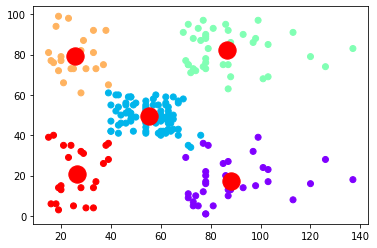

In [41]:
#plt.scatter(X[:,0], X[:,1])
plt.scatter(X[:,0], X[:,1], c=pred_y, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, 
            c='red')
plt.show()

In [ ]:
plt.scatter(X[:,0], X[:,1], c=pred_y, cmap='rainbow')